<h1 align="center">Introduction to SimpleITKv4 Registration</h1>


<table width="100%">
<tr style="background-color: red;"><td><font color="white">SimpleITK conventions:</font></td></tr>
<tr><td>
<ul>
<li>Dimensionality and pixel type of registered images is required to be the same (2D/2D or 3D/3D).</li>
<li>Supported pixel types are sitkFloat32 and sitkFloat64 (use the SimpleITK <a href="http://www.itk.org/SimpleITKDoxygen/html/namespaceitk_1_1simple.html#af8c9d7cc96a299a05890e9c3db911885">Cast()</a> function if your image's pixel type is something else).
</ul>
</td></tr>
</table>


## Registration Components 

<img src="ITKv4RegistrationComponentsDiagram.svg" style="width:700px"/><br><br>

There are many options for creating an instance of the registration framework, all of which are configured in SimpleITK via methods of the <a href="http://www.itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageRegistrationMethod.html">ImageRegistrationMethod</a> class. This class encapsulates many of the components available in ITK for constructing a registration instance.

Currently, the available choices from the following groups of ITK components are:

### Optimizers

The SimpleITK registration framework supports several optimizer types via the SetOptimizerAsX() methods, these include:

<ul>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1ExhaustiveOptimizerv4.html">Exhaustive</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1AmoebaOptimizerv4.html">Nelder-Mead downhill simplex</a>, a.k.a. Amoeba.
  </li>
  <li>
   <a href="https://itk.org/Doxygen/html/classitk_1_1PowellOptimizerv4.html">Powell optimizer</a>.
  </li>
  <li>
   <a href="https://itk.org/Doxygen/html/classitk_1_1OnePlusOneEvolutionaryOptimizerv4.html">1+1 evolutionary optimizer</a>.
  </li>
  <li>
  Variations on gradient descent:
  <ul>
    <li>
    <a href="http://www.itk.org/Doxygen/html/classitk_1_1GradientDescentOptimizerv4Template.html">GradientDescent</a>
    </li>
    <li>
    <a href="http://www.itk.org/Doxygen/html/classitk_1_1GradientDescentLineSearchOptimizerv4Template.html">GradientDescentLineSearch</a>
    </li>
    <li>
    <a href="http://www.itk.org/Doxygen/html/classitk_1_1RegularStepGradientDescentOptimizerv4.html">RegularStepGradientDescent</a>
    </li>
  </ul>
  </li>
  <li>
    <a href="http://www.itk.org/Doxygen/html/classitk_1_1ConjugateGradientLineSearchOptimizerv4Template.html">ConjugateGradientLineSearch</a> 
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1LBFGSBOptimizerv4.html">L-BFGS-B</a> (Limited memory Broyden,  Fletcher,Goldfarb,Shannon-Bound Constrained) - supports the use of simple constraints ($l\leq x \leq u$)  
  </li>
  <li>
  <a href="https://itk.org/Doxygen/html/classitk_1_1LBFGS2Optimizerv4.html">L-BFGS2</a> (Limited memory Broyden, Fletcher, Goldfarb, Shannon) 
  </li>
</ul>

 
### Similarity metrics

The SimpleITK registration framework supports several metric types via the SetMetricAsX() methods, these include:

<ul>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1MeanSquaresImageToImageMetricv4.html">MeanSquares</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1DemonsImageToImageMetricv4.html">Demons</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1CorrelationImageToImageMetricv4.html">Correlation</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1ANTSNeighborhoodCorrelationImageToImageMetricv4.html">ANTSNeighborhoodCorrelation</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1JointHistogramMutualInformationImageToImageMetricv4.html">JointHistogramMutualInformation</a>
  </li>
  <li>
  <a href="http://www.itk.org/Doxygen/html/classitk_1_1MattesMutualInformationImageToImageMetricv4.html">MattesMutualInformation</a>
  </li>
</ul>


### Interpolators

The SimpleITK registration framework supports several interpolators via the SetInterpolator() method, which receives one of
the <a href="http://www.itk.org/SimpleITKDoxygen/html/namespaceitk_1_1simple.html#a7cb1ef8bd02c669c02ea2f9f5aa374e5">following enumerations</a>:
<ul>
<li> sitkNearestNeighbor </li>
<li> sitkLinear </li>
<li> sitkBSpline </li>
<li> sitkGaussian </li>
<li> sitkHammingWindowedSinc </li>
<li> sitkCosineWindowedSinc </li>
<li> sitkWelchWindowedSinc </li>
<li> sitkLanczosWindowedSinc </li>
<li> sitkBlackmanWindowedSinc </li>
</ul>

## Data -  Retrospective Image Registration Evaluation

We will be using part of the training data from the Retrospective Image Registration Evaluation (<a href="http://www.insight-journal.org/rire/">RIRE</a>) project.

In [1]:
import SimpleITK as sitk
import cv2

# Utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data).
%run update_path_to_download_script
from downloaddata import fetch_data as fdata

# Always write output to a separate directory, we don't want to pollute the source directory. 
import os

ch_rigid= 0 #TODO
ch_ffd=  0 #TODO
animal_source="Animal1"
animal_moving="Animal3"
afterRigid="Rigid"
afterFFD="FFD"
dsFactor=2
rot = 0 # only rotates by multiples of 90 deg
extendZ = 30 # applied to both src and mv in Z dim
offset = 40 # translation in X applied only to mv, before rigid reg.
inputDir='/home/manan/Desktop/Johannes/Manan/BigStitcher/'
outputDir='/home/manan/Desktop/'


OUTPUT_DIR = outputDir+animal_source+"-src_"+animal_moving+"-mv_ch"+str(ch_rigid)+"-rigid_ch"+str(ch_ffd)+"-ffd/"

In [2]:
print(OUTPUT_DIR)
import os
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

/home/manan/Desktop/Animal1-src_Animal3-mv_ch0-rigid_ch0-ffd/


## Utility functions
A number of utility callback functions for image display and for plotting the similarity metric during registration.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import clear_output

# Callback invoked by the interact IPython method for scrolling through the image stacks of
# the two images (moving and fixed).
def display_images(fixed_image_z, moving_image_z, fixed_npa, moving_npa):
    # Create a figure with two subplots and the specified size.
    plt.subplots(1,2,figsize=(10,8))
    
    # Draw the fixed image in the first subplot.
    plt.subplot(1,2,1)
    plt.imshow(fixed_npa[fixed_image_z,:,:],cmap=plt.cm.Greys_r);
    plt.title('fixed image')
    plt.axis('off')
    
    # Draw the moving image in the second subplot.
    plt.subplot(1,2,2)
    plt.imshow(moving_npa[moving_image_z,:,:],cmap=plt.cm.Greys_r);
    plt.title('moving image')
    plt.axis('off')
    
    plt.show()

# Callback invoked by the IPython interact method for scrolling and modifying the alpha blending
# of an image stack of two images that occupy the same physical space. 
def display_images_with_alpha(image_z, alpha, fixed, moving):
    img = (1.0 - alpha)*fixed[:,:,image_z] + alpha*moving[:,:,image_z] 
    plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()
    
# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations
    
    metric_values = []
    multires_iterations = []

# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations
    
    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()

# Callback invoked when the IterationEvent happens, update our data and display new figure.
def plot_values(registration_method):
    global metric_values, multires_iterations
    
    metric_values.append(registration_method.GetMetricValue())                                       
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, 'r')
    plt.plot(multires_iterations, [metric_values[index] for index in multires_iterations], 'b*')
    plt.xlabel('Iteration Number',fontsize=12)
    plt.ylabel('Metric Value',fontsize=12)
    plt.show()
    
# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the 
# metric_values list. 
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))

## Read images

We first read the images, casting the pixel type to that required for registration (Float32 or Float64) and look at them.

In [4]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np

In [5]:
fixedImagePath = inputDir + animal_source + '.tif'
movingImagePath =inputDir + animal_moving + '.tif'

In [6]:
fixed_image = tifffile.imread(fixedImagePath)
moving_image = tifffile.imread(movingImagePath)
channels = np.arange(fixed_image.shape[1])
print("Fixed image is originally of shape", fixed_image.shape, "\nMoving image is originally of shape", moving_image.shape)

Fixed image is originally of shape (235, 3, 1064, 1064) 
Moving image is originally of shape (269, 3, 1064, 1064)


In [7]:
a = os.path.basename(fixedImagePath)[:-4]
b = os.path.basename(movingImagePath)[:-4]
c = "_ch_" + str(ch_rigid)
d = "_fixed"
e = "_moving"

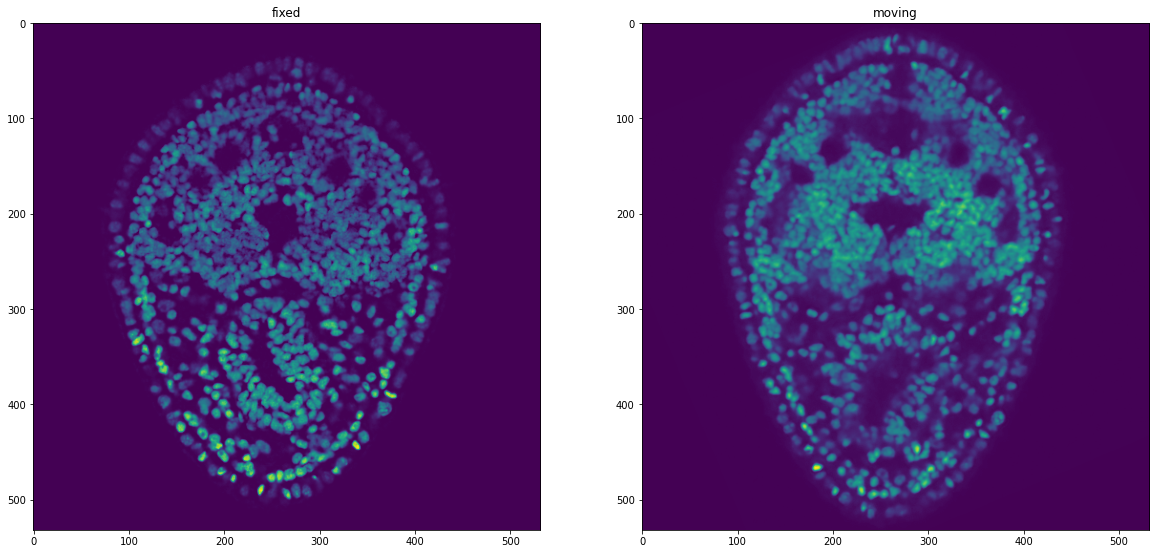

In [8]:
globals()[a + c + d] = fixed_image[:, ch_rigid, ...][::dsFactor, ::dsFactor, ::dsFactor] # ZYX
globals()[b + c + e] = moving_image[:, ch_rigid, ...][::dsFactor, ::dsFactor, ::dsFactor] # ZYX

sl = globals()[a + c + d].shape[0]//2
plt.figure(figsize= (20, 10))
plt.subplot(1,2,1)
plt.title('fixed')
plt.imshow(globals()[a + c + d][sl, ...])
plt.subplot(1,2,2)
plt.title('moving')
plt.imshow(globals()[b + c + e][sl, ...])



In [9]:
# rotate the source image : test

In [10]:
import rotate
from sklearn.decomposition import PCA

In [11]:
globals()[a + c + d]=np.array(np.rot90(globals()[a + c + d], 1, axes=(1, 2)))

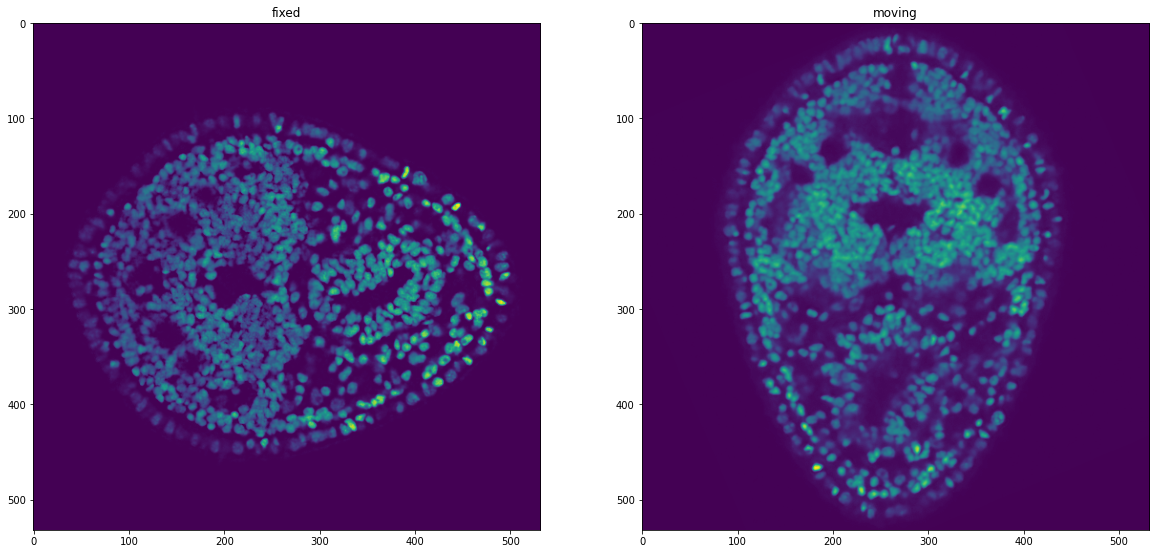

In [12]:
plt.figure(figsize= (20, 10))
plt.subplot(1,2,1)
plt.title('fixed')
plt.imshow(globals()[a + c + d][sl, ...])
plt.subplot(1,2,2)
plt.title('moving')
plt.imshow(globals()[b + c + e][sl, ...])


(118, 532, 532)


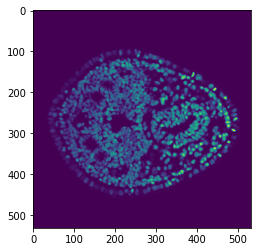

In [35]:
print(globals()[a + c + d].shape)
plt.imshow(globals()[a + c + d][60, ...])

In [13]:
def getCOM(arr):
    return np.average(arr, 0)

In [38]:
blobs = rotate.findBlobs(globals()[a + c + d][60, ...], scales=range(2, 4), threshold= 20)
blobs_array= np.asarray(blobs)
nuclei= blobs_array[:, 1:]
com=getCOM(nuclei)

In [39]:
blobs_array

array([], shape=(0, 3), dtype=int64)

In [16]:
pca = PCA(n_components=3)
pca.fit(nuclei)
pca_score = pca.explained_variance_ratio_

V = pca.components_
print("components are", V)
#print("variance", pca_score)
print("actual variance", pca.explained_variance_)

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

## rotate image

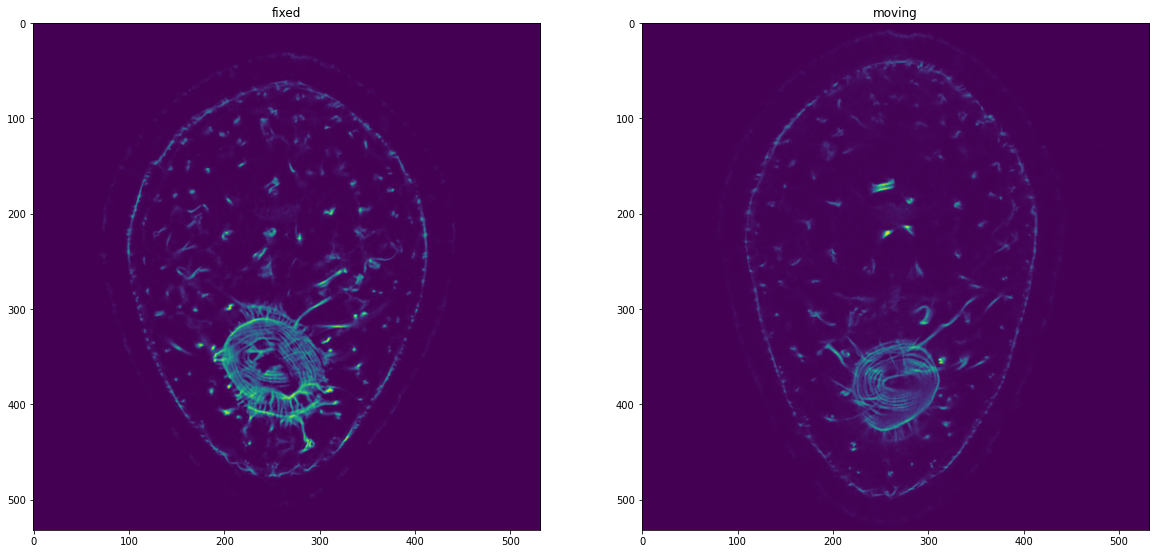

In [11]:

rotated_image=np.array(np.rot90(globals()[b + c + e], rot, axes=(1, 2))) # TODO
plt.figure(figsize= (20, 10))
plt.subplot(1,2,1)
plt.title('fixed')
plt.imshow(globals()[a + c + d][50, ...])
plt.subplot(1,2,2)
plt.title('moving')
plt.imshow(rotated_image[50, ...])

globals()[b + c + e] = rotated_image


## add slices to both images


In [12]:

st=np.zeros((extendZ, globals()[a + c + d].shape[1], globals()[a + c + d].shape[2]))
end=np.zeros((extendZ, globals()[b + c + e].shape[1], globals()[b + c + e].shape[2]))
source=np.concatenate((st, globals()[a + c + d], end), axis=0)
moving=np.concatenate((st, globals()[b + c + e], end), axis=0)
print("New fixed image is of shape: ", source.shape)
print("New moving image is of shape: ", moving.shape)

New fixed image is of shape:  (178, 532, 532)
New moving image is of shape:  (195, 532, 532)


In [11]:
# TODO: add rotation, good for control testing

In [13]:
left_margin = np.zeros((source.shape[1], offset))
new_moving= np.zeros_like(moving)
for z in range(moving.shape[0]):
    temp=np.hstack((left_margin,  moving[z]))
    temp=temp[:, :-offset]
    new_moving[z] = temp
moving = new_moving

Text(0.5, 1.0, 'moving')

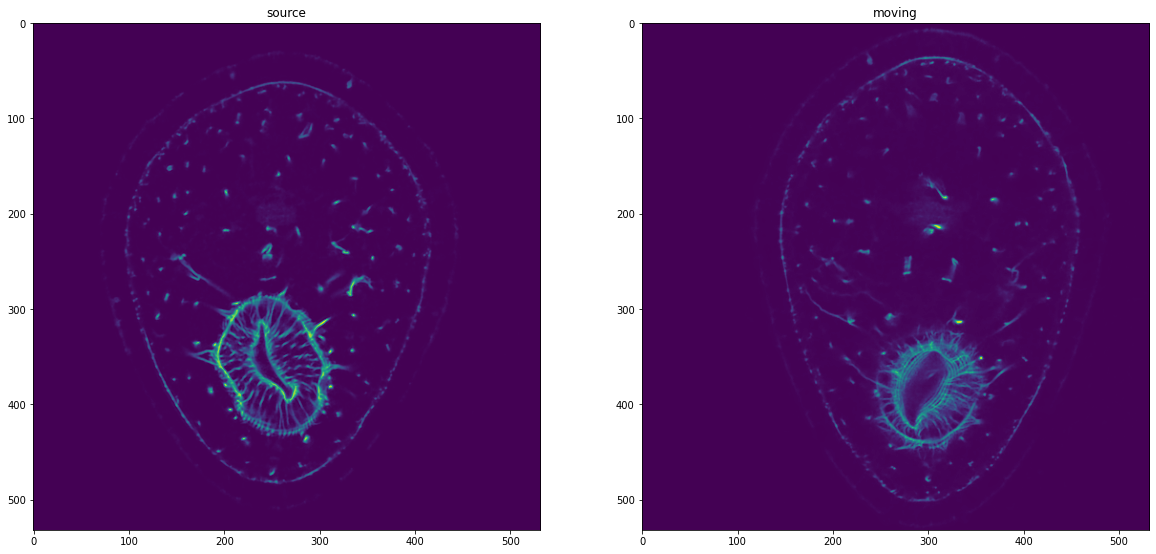

In [14]:
sl = source.shape[0]//2
plt.figure(figsize= (20, 10))
plt.subplot(1,2,1)
plt.imshow(source[sl, ...])
plt.title('source')
plt.subplot(1,2,2)
plt.imshow(moving[sl, ...])
plt.title('moving')


In [14]:
#from tqdm import tqdm
#tifffile.imsave(OUTPUT_DIR + animal_source+'-'+str(ch_ffd)+'.tif', fixed_image.astype(np.uint16))

### mu-std Normalisation

In [15]:
mean_moving=np.mean(moving)
std_moving=np.std(moving)

mean_source=np.mean(source)
std_source=np.std(source)

moving_norm = (moving - mean_moving)/(std_moving)
source_norm = (source - mean_source)/(std_source)

moving= moving_norm
source=source_norm

min source -0.19435308619233416 max source 42.37585963506615
min moving -0.26120861344358187 max moving 20.08625288548963


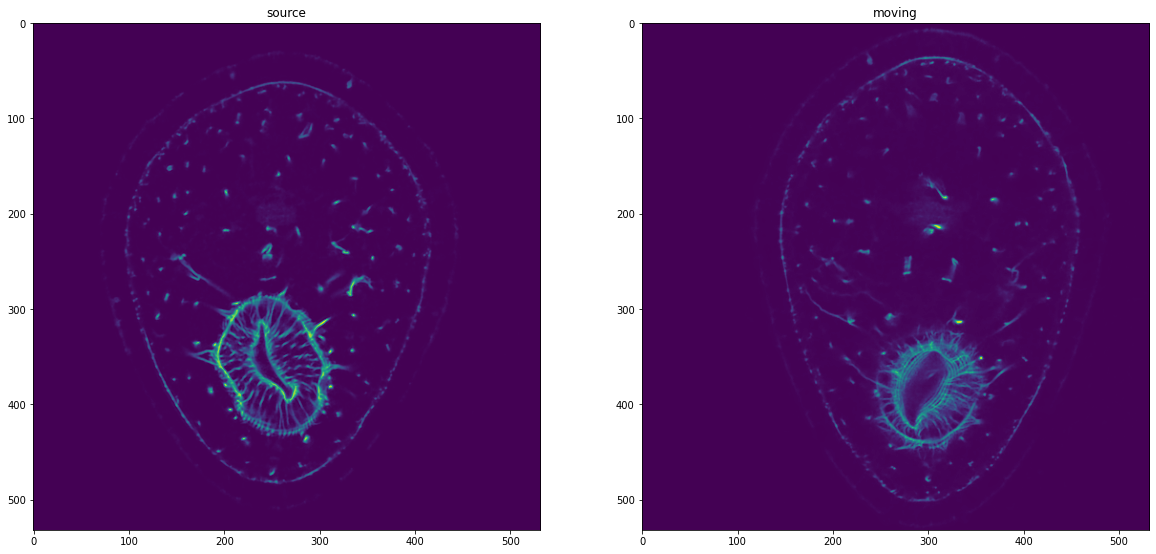

In [16]:
sl = source.shape[0]//2
plt.figure(figsize= (20, 10))
plt.subplot(1,2,1)
plt.imshow(source[sl, ...])
plt.title('source')
plt.subplot(1,2,2)
plt.imshow(moving[sl, ...])
plt.title('moving')
print("min source", np.min(source), "max source", np.max(source))
print("min moving", np.min(moving), "max moving", np.max(moving))

In [17]:
source = sitk.GetImageFromArray(source)
moving = sitk.GetImageFromArray(moving)


interact(display_images, fixed_image_z=(0,source.GetSize()[2]-1), moving_image_z=(0,moving.GetSize()[2]-1), fixed_npa = fixed(sitk.GetArrayViewFromImage(source)), moving_npa=fixed(sitk.GetArrayViewFromImage(moving)));

interactive(children=(IntSlider(value=88, description='fixed_image_z', max=177), IntSlider(value=97, descripti…

## Initial Alignment

Use the CenteredTransformInitializer to align the centers of the two volumes and set the center of rotation to the center of the fixed image.

In [18]:
initial_transform = sitk.CenteredTransformInitializer(source, 
                                                      moving, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

moving_resampled = sitk.Resample(moving, source, initial_transform, sitk.sitkLinear, 0.0, moving.GetPixelID())

interact(display_images_with_alpha, image_z=(0,source.GetSize()[2]-1), alpha=(0,1 ,0.05), fixed = fixed(source), moving=fixed(moving_resampled));

interactive(children=(IntSlider(value=88, description='image_z', max=177), FloatSlider(value=0.0, description=…

## Registration

The specific registration task at hand estimates a 3D rigid transformation between images of different modalities. There are multiple components from each group (optimizers, similarity metrics, interpolators) that are appropriate for the task. Note that each component selection requires setting some parameter values. We have made the following choices:

<ul>
<li>Similarity metric, mutual information (Mattes MI):
<ul>
  <li>Number of histogram bins, 50.</li>
  <li>Sampling strategy, random.</li>
  <li>Sampling percentage, 1%.</li>
</ul>
</li>
<li>Interpolator, sitkLinear.</li>
<li>Optimizer, gradient descent: 
<ul>
  <li>Learning rate, step size along traversal direction in parameter space, 1.0 .</li>
  <li>Number of iterations, maximal number of iterations, 100.</li>
  <li>Convergence minimum value, value used for convergence checking in conjunction with the energy profile of the similarity metric that is estimated in the given window size, 1e-6.</li>
  <li>Convergence window size, number of values of the similarity metric which are used to estimate the energy profile of the similarity metric, 10.</li>
</ul>
</li>
</ul>


Perform registration using the settings given above, and take advantage of the built in multi-resolution framework, use a three tier pyramid.  

In this example we plot the similarity metric's value during registration. Note that the change of scales in the multi-resolution framework is readily visible.

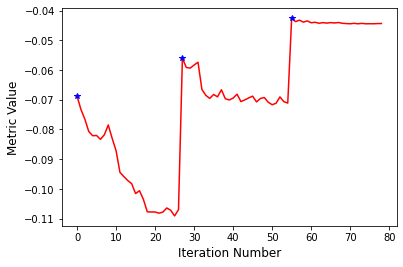

In [19]:
registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings. # TODO - lr : 1
registration_method.SetOptimizerAsGradientDescent(learningRate=1.5, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.            
registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Don't optimize in-place, we would possibly like to run this cell multiple times.
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
registration_method.AddCommand(sitk.sitkStartEvent, start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, end_plot)
registration_method.AddCommand(sitk.sitkMultiResolutionIterationEvent, update_multires_iterations) 
registration_method.AddCommand(sitk.sitkIterationEvent, lambda: plot_values(registration_method))

final_transform = registration_method.Execute(sitk.Cast(source, sitk.sitkFloat32), 
                                               sitk.Cast(moving, sitk.sitkFloat32))

## Post registration analysis

Query the registration method to see the metric value and the reason the optimization terminated. 

The metric value allows us to compare multiple registration runs as there is a probabilistic aspect to our registration, we are using random sampling to estimate the similarity metric.

Always remember to query why the optimizer terminated. This will help you understand whether termination is too early, either due to thresholds being too tight, early termination due to small number of iterations - numberOfIterations, or too loose, early termination due to large value for minimal change in similarity measure - convergenceMinimumValue)

In [20]:
print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
print('Optimizer\'s stopping condition, {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

Final metric value: -0.0445803992693861
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.


Now visually inspect the results.

In [21]:
moving_resampled = sitk.Resample(moving, source, final_transform, sitk.sitkLinear, 0.0, moving.GetPixelID())
interact(display_images_with_alpha, image_z=(0,source.GetSize()[2] - 1), alpha=(0.0,1.0,0.05), fixed = fixed(source), moving=fixed(moving_resampled));

interactive(children=(IntSlider(value=88, description='image_z', max=177), FloatSlider(value=0.5, description=…

In [22]:
print("source image is of shape: ", source.GetSize())
print("moving resampled image is of shape: ", moving_resampled.GetSize())

source image is of shape:  (532, 532, 178)
moving resampled image is of shape:  (532, 532, 178)


### Apply the same transform to channel 2

In [23]:
def applyTransform(fixed_image, moving_image, transform):
    fixed_image = sitk.GetImageFromArray(fixed_image)
    moving_image = sitk.GetImageFromArray(moving_image)
    return sitk.Resample(moving_image, fixed_image, transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
  

In [24]:
def preprocessImage(fixed_image, moving_image=None, dsFactor=2, offset = 40, extendZ = 30):
    fixed_image = fixed_image[::dsFactor, ::dsFactor, ::dsFactor]
    
    st=np.zeros((extendZ, fixed_image.shape[1], fixed_image.shape[2]))
    end=np.zeros((extendZ, fixed_image.shape[1], fixed_image.shape[2]))
    fixed_image=np.concatenate((st, fixed_image, end), axis=0)
    lm = np.zeros((fixed_image.shape[1], offset))
    
    if(moving_image is not None):
        moving_image = moving_image[::dsFactor, ::dsFactor, ::dsFactor]
        moving_image=np.concatenate((st, moving_image, end), axis=0)

        new_moving_image= np.zeros_like(moving_image)

        for z in range(moving_image.shape[0]):
            temp=np.hstack((lm,  moving_image[z]))
            temp=temp[:, :-offset]
            new_moving_image[z] = temp

        moving_image=new_moving_image
        return fixed_image, moving_image
    else:
        return fixed_image


In [25]:
def makeMIP(im, offset, details, sitkArray=True):
    if sitkArray:
        im=np.max(sitk.GetArrayFromImage(im).astype(np.uint16), axis=0)
    else:
        im=np.max(im.astype(np.uint16), axis=0)
    texted_image =cv2.putText(img=np.copy(im), text=details, org=(int(np.shape(im)[1]*0.05),int(np.shape(im)[0]*0.05 + offset) ), fontFace=0, fontScale=0.5, color=(int(np.max(im)),int(np.max(im)), 0), thickness=0)
    return texted_image

In [26]:
fixed_image = tifffile.imread(fixedImagePath)
moving_image = tifffile.imread(movingImagePath)

transformed_image=[]
mip_fixed=[]
mip_rigid=[]
for channel in channels:
    print("channel", channel)
    fixed_image_pp, moving_image_pp = preprocessImage(fixed_image[:, channel, ...], moving_image[:, channel, ...], dsFactor, offset, extendZ)
    moving_image_resampled = applyTransform(fixed_image_pp, moving_image_pp, final_transform)
    mip_rigid.append(makeMIP(moving_image_resampled, offset = 0*channel, details=animal_moving+'_'+afterRigid+'-ch'+str(ch_rigid)))
    mip_fixed.append(makeMIP(fixed_image_pp, offset = 0*channel, details=animal_source, sitkArray=False))
    tifffile.imsave(OUTPUT_DIR + animal_moving+'-ch'+str(channel) +'_'+afterRigid+'-ch'+str(ch_rigid)+'.tif', sitk.GetArrayFromImage(moving_image_resampled).astype(np.uint16))
    tifffile.imsave(OUTPUT_DIR + animal_source+'-ch'+str(channel) +'.tif', fixed_image_pp.astype(np.uint16))
    transformed_image.append(sitk.GetArrayFromImage(moving_image_resampled))
tifffile.imsave(OUTPUT_DIR + animal_source+'_MIP'+'.tif', np.asarray(mip_fixed))
tifffile.imsave(OUTPUT_DIR + animal_moving+'_'+afterRigid+'-ch'+str(ch_rigid)+'_MIP'+'.tif', np.asarray(mip_rigid))

channel 0
channel 1
channel 2


In [27]:
transformed_image = np.asarray(transformed_image)
print("After RIGID transform, new image shape is ", transformed_image.shape) # CZYX

After RIGID transform, new image shape is  (3, 178, 532, 532)


### Now begins FFD on 1 channel !!

In [28]:
def normalize(arr, mean, std):
    return (arr-mean)/std

def denormalize(arr, mean, std):
    return arr*std + mean


In [29]:
moving_image = normalize(transformed_image[2, ...] \
                         ,np.mean(transformed_image[2, ...]), np.std(transformed_image[2, ...]))

fixed_image = tifffile.imread(fixedImagePath)
fixed_image_pp = preprocessImage(fixed_image[:, 2, ...], None, dsFactor, offset, extendZ)
fixed_image = normalize(fixed_image_pp, np.mean(fixed_image_pp), np.std(fixed_image_pp))


min moving -0.3638851263439483 max moving 44.52980413920543
min fixed -0.11564258482272322 max fixed 223.00003212820755


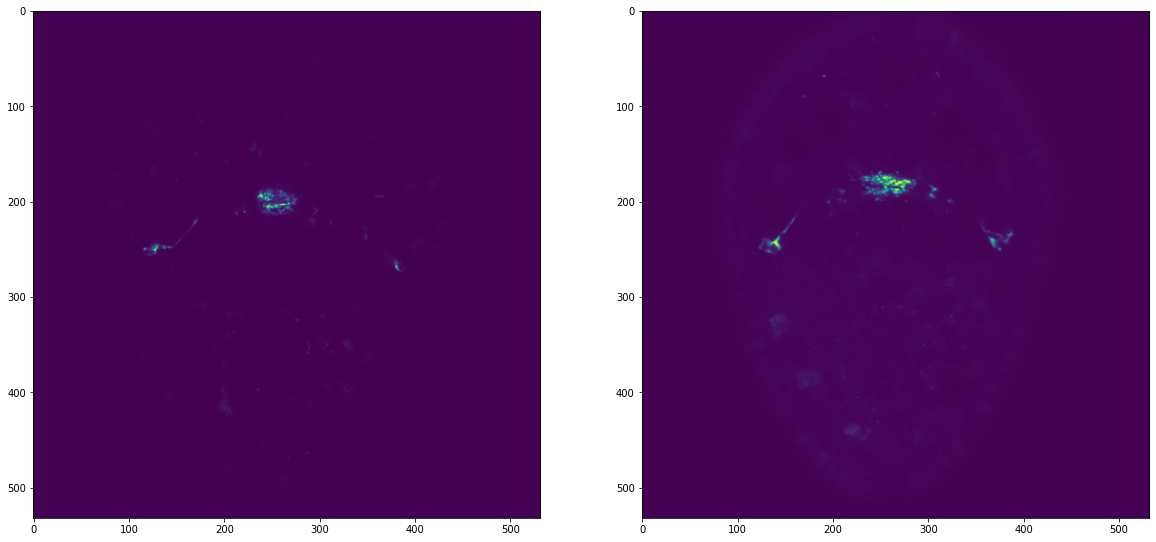

In [30]:
sl = np.shape(fixed_image)[0]//2
plt.figure(figsize= (20, 10))
plt.subplot(1,2,1)
plt.imshow(fixed_image[sl, ...])
plt.subplot(1,2,2)
plt.imshow(moving_image[sl, ...])
print("min moving", np.min(moving_image), "max moving", np.max(moving_image))
print("min fixed", np.min(fixed_image), "max fixed", np.max(fixed_image))

In [31]:
fixed_image = sitk.GetImageFromArray(fixed_image)
moving_image = sitk.GetImageFromArray(moving_image)
interact(display_images, fixed_image_z=(0,fixed_image.GetSize()[2]-1), moving_image_z=(0,moving_image.GetSize()[2]-1), fixed_npa = fixed(sitk.GetArrayViewFromImage(fixed_image)), moving_npa=fixed(sitk.GetArrayViewFromImage(moving_image)));


interactive(children=(IntSlider(value=88, description='fixed_image_z', max=177), IntSlider(value=88, descripti…

In [32]:
def bspline_intra_modal_registration(fixed_image, moving_image, fixed_image_mask=None, fixed_points=None, moving_points=None):

    registration_method = sitk.ImageRegistrationMethod()
    
    # Determine the number of BSpline control points using the physical spacing we want for the control grid. 
    grid_physical_spacing = [50.0, 50.0, 50.0] # A control point every 50mm
    image_physical_size = [size*spacing for size,spacing in zip(fixed_image.GetSize(), fixed_image.GetSpacing())]
    mesh_size = [int(image_size/grid_spacing + 0.5) \
                 for image_size,grid_spacing in zip(image_physical_size,grid_physical_spacing)]

    initial_transform = sitk.BSplineTransformInitializer(image1 = fixed_image, 
                                                         transformDomainMeshSize = mesh_size, order=3)    
    registration_method.SetInitialTransform(initial_transform)
        
    registration_method.SetMetricAsMeanSquares()
    # Settings for metric sampling, usage of a mask is optional. When given a mask the sample points will be 
    # generated inside that region. Also, this implicitly speeds things up as the mask is smaller than the
    # whole image.
    registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
    registration_method.SetMetricSamplingPercentage(0.01)
    if fixed_image_mask:
        registration_method.SetMetricFixedMask(fixed_image_mask)
    
    # Multi-resolution framework.            
    registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
    registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
    registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

    registration_method.SetInterpolator(sitk.sitkLinear)
    registration_method.SetOptimizerAsLBFGSB(gradientConvergenceTolerance=1e-5, numberOfIterations=100)
    

    # If corresponding points in the fixed and moving image are given then we display the similarity metric
    # and the TRE during the registration.
    if fixed_points and moving_points:
        registration_method.AddCommand(sitk.sitkStartEvent, rc.metric_and_reference_start_plot)
        registration_method.AddCommand(sitk.sitkEndEvent, rc.metric_and_reference_end_plot)
        registration_method.AddCommand(sitk.sitkIterationEvent, lambda: rc.metric_and_reference_plot_values(registration_method, fixed_points, moving_points))
    
    return registration_method.Execute(fixed_image, moving_image)

In [33]:
#%%timeit -r1 -n1


# Select the fixed and moving images, valid entries are in [0,1].
fixed_image_index = 0
moving_image_index = 1

tx = bspline_intra_modal_registration(fixed_image = fixed_image, 
                                      moving_image = moving_image,
                                      fixed_image_mask = None,
                                      fixed_points = None, 
                                      moving_points = None
                                     )

#initial_errors_mean, initial_errors_std, _, initial_errors_max, initial_errors = ru.registration_errors(sitk.Euler3DTransform(), points[fixed_image_index], points[moving_image_index])
#final_errors_mean, final_errors_std, _, final_errors_max, final_errors = ru.registration_errors(tx, points[fixed_image_index], points[moving_image_index])

#plt.hist(initial_errors, bins=20, alpha=0.5, label='before registration', color='blue')
#plt.hist(final_errors, bins=20, alpha=0.5, label='after registration', color='green')
#plt.legend()
#plt.title('TRE histogram');
#print('Initial alignment errors in millimeters, mean(std): {:.2f}({:.2f}), max: {:.2f}'.format(initial_errors_mean, initial_errors_std, initial_errors_max))
#print('Final alignment errors in millimeters, mean(std): {:.2f}({:.2f}), max: {:.2f}'.format(final_errors_mean, final_errors_std, final_errors_max))

In [34]:
moving_resampled_ffd = sitk.Resample(moving_image, fixed_image, tx, sitk.sitkLinear, 0.0, moving_image.GetPixelID())

interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2] - 1), alpha=(0.0,1.0,0.05), fixed = fixed(fixed_image), moving=fixed(moving_resampled_ffd));

interactive(children=(IntSlider(value=88, description='image_z', max=177), FloatSlider(value=0.5, description=…

In [36]:
transformed_image_ffd=[]
mip_ffd=[]
for channel in channels:
    print("channel: ", channel)
    moving_resampled=sitk.Resample(sitk.GetImageFromArray(transformed_image[channel, ...]), fixed_image, tx, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
    moving_resampled_array=sitk.GetArrayFromImage(moving_resampled)
    transformed_image_ffd.append(moving_resampled_array)
    mip_ffd.append(makeMIP(moving_resampled_array, offset = 0*channel, details=animal_moving+'_'+afterRigid+'-ch'+str(ch_rigid)+'_'+afterFFD+'-ch'+str(ch_ffd), sitkArray=False))
    tifffile.imsave(OUTPUT_DIR + animal_moving+'-ch'+str(channel) +'_'+afterRigid+'-ch'+str(ch_rigid)+'_'+afterFFD+'-ch'+str(ch_ffd)+'.tif', moving_resampled_array.astype(np.uint16))
tifffile.imsave(OUTPUT_DIR + animal_moving+'_'+afterRigid+'-ch'+str(ch_rigid)+'_'+afterFFD+'-ch'+str(ch_ffd)+'_MIP'+'.tif', np.asarray(mip_ffd))

### END